In [1]:
import pandas as pd
from glob import glob

In [2]:
file = glob(r'Uber Data/*.csv')
data = []
for f in file:
    df = pd.read_csv(f)
    data.append(df)

In [3]:
df = pd.concat(data)
df.to_csv('Uber Data/Uber.csv',index=False)

In [4]:
mydf = pd.read_csv('Uber Data/Uber.csv')

In [5]:
mydf.head()

,Date/Time,Lat,Lon,Base
0,2014/4/1 00:11:00,40.7690,-73.9549,B02512
1,2014/4/1 00:17:00,40.7267,-74.0345,B02512
2,2014/4/1 00:21:00,40.7316,-73.9873,B02512
3,2014/4/1 00:28:00,40.7588,-73.9776,B02512
4,2014/4/1 00:33:00,40.7594,-73.9722,B02512


In [6]:
mydf.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
shape = mydf.shape
print('Rows'+str(shape[0]) +'\n'+'Column'+str(shape[1]))

Rows1572840
Column4


In [8]:
mydf['Date/Time'] = pd.to_datetime(mydf['Date/Time'])

In [9]:
mydf['Time'] = mydf['Date/Time'].dt.time

In [10]:
mydf['Month'] = mydf['Date/Time'].dt.month_name()

In [11]:
mydf['Year'] = mydf['Date/Time'].dt.year

In [12]:
mydf['Day of Week'] = mydf['Date/Time'].dt.day_name()

In [13]:
mydf['Hour'] = mydf['Date/Time'].dt.hour

In [14]:
mydf['Minute'] = mydf['Date/Time'].dt.minute

In [15]:
mydf['Second'] = mydf['Date/Time'].dt.second

In [16]:
mydf['Day'] = mydf['Date/Time'].dt.day

In [17]:
mydf.head()

,Date/Time,Lat,Lon,Base,Time,Month,Year,Day of Week,Hour,Minute,Second,Day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,April,2014,Tuesday,0,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,April,2014,Tuesday,0,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,April,2014,Tuesday,0,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,April,2014,Tuesday,0,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,April,2014,Tuesday,0,33,0,1


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
hour_count = mydf['Hour'].value_counts().sort_index()

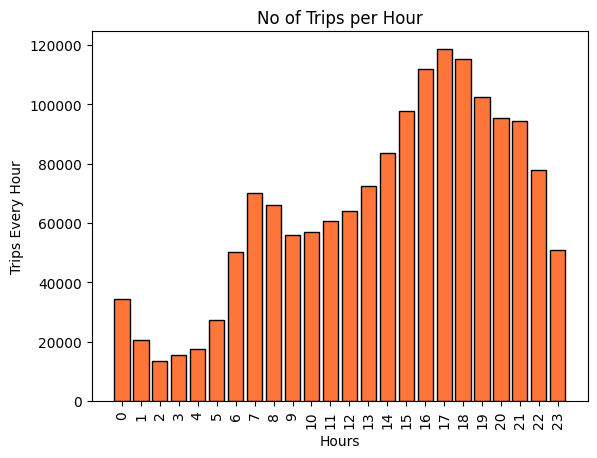

In [20]:
plt.bar(hour_count.index,hour_count.values,color = '#FF763A',edgecolor = 'black')
plt.title('No of Trips per Hour')
plt.xticks(hour_count.index,rotation='vertical')
plt.xlabel('Hours')
plt.ylabel('Trips Every Hour')
plt.show()

<Figure size 1200x800 with 0 Axes>

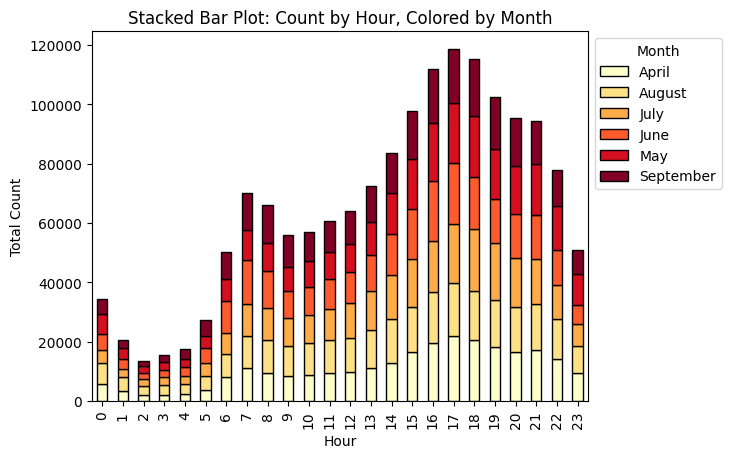

In [21]:
hourly_totals = mydf.groupby(['Hour', 'Month']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
hourly_totals.plot(kind='bar', stacked=True, colormap='YlOrRd',edgecolor = 'black')
plt.title('Stacked Bar Plot: Count by Hour, Colored by Month')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
day_count = mydf.groupby('Day').size()

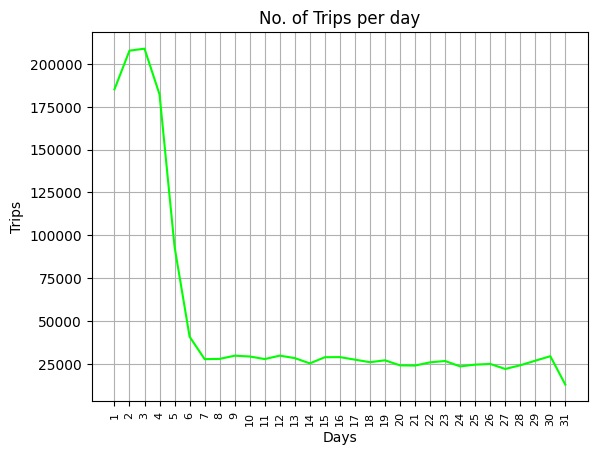

In [23]:
plt.plot(day_count.index,day_count.values,color = '#00FF00')
plt.xticks(day_count.index,rotation = 'vertical',size=8)
plt.xlabel("Days")
plt.ylabel("Trips")
plt.title('No. of Trips per day')
plt.grid()
plt.show()

<Figure size 1200x800 with 0 Axes>

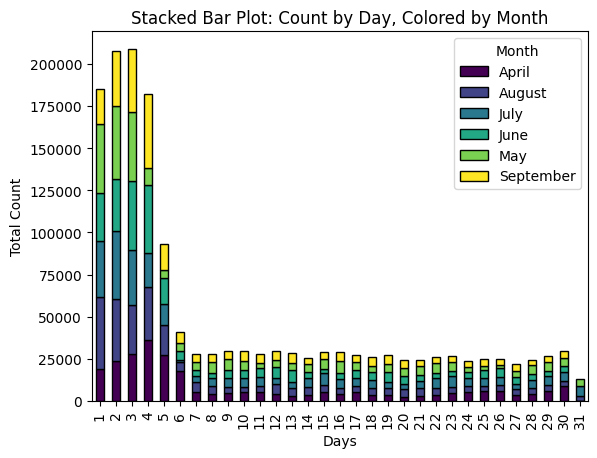

In [24]:
day_totals = mydf.groupby(['Day', 'Month']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
day_totals.plot(kind='bar', stacked=True, colormap='viridis',edgecolor = 'black')
plt.title('Stacked Bar Plot: Count by Day, Colored by Month')
plt.xlabel('Days')
plt.ylabel('Total Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

In [25]:
month_count = mydf.groupby('Day of Week').size()
print(month_count)

Day of Week
Friday       263396
Monday       174508
Saturday     208636
Sunday       152932
Thursday     272908
Tuesday      247536
Wednesday    252924
dtype: int64


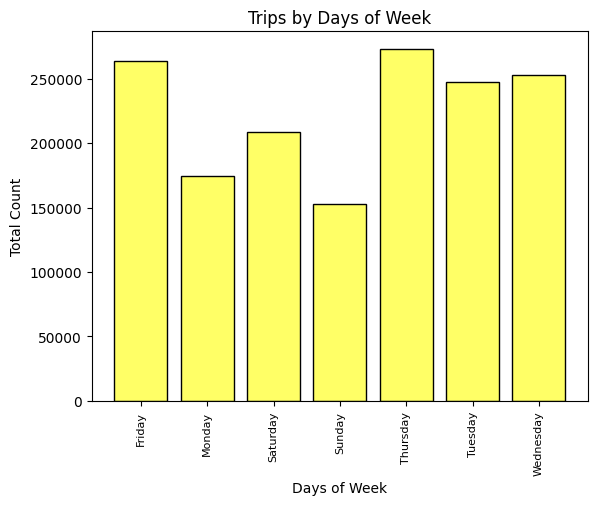

In [26]:
#plotting
plt.bar(month_count.index,month_count.values,color = '#FFFF66',edgecolor='black')
plt.xticks(month_count.index,rotation = 'vertical',size = 8)
plt.xlabel('Days of Week')
plt.ylabel('Total Count')
plt.title('Trips by Days of Week')
plt.show()

<Figure size 1200x800 with 0 Axes>

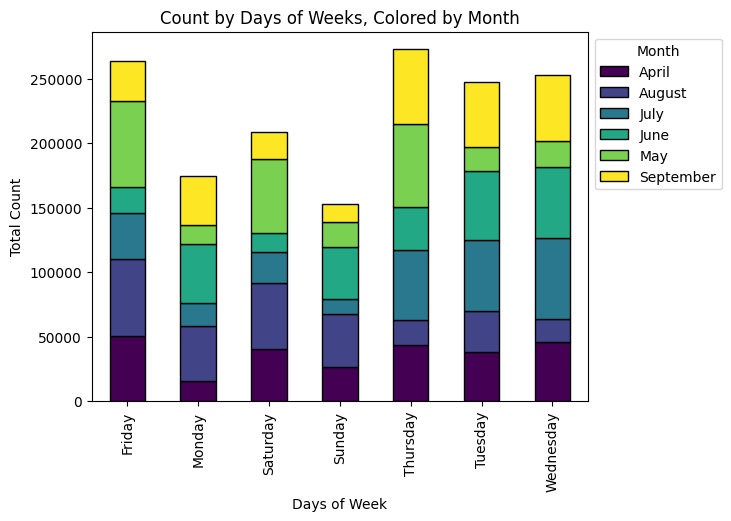

In [27]:
dayofweek_totals = mydf.groupby(['Day of Week', 'Month']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
dayofweek_totals.plot(kind='bar', stacked=True, colormap='viridis',edgecolor='black')
plt.title('Count by Days of Weeks, Colored by Month')
plt.xlabel('Days of Week')
plt.ylabel('Total Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

In [28]:
Base_count = mydf.groupby('Base').size()

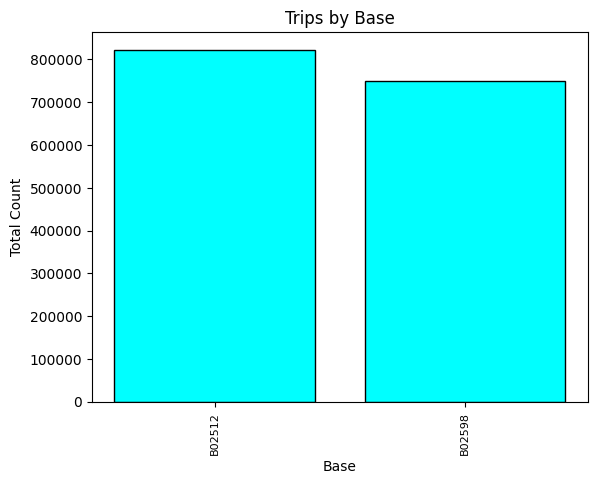

In [29]:
#plotting
plt.bar(Base_count.index,Base_count.values,color = 'cyan',edgecolor = 'black')
plt.xticks(Base_count.index,rotation = 'vertical',size = 8)
plt.xlabel('Base')
plt.ylabel('Total Count')
plt.title('Trips by Base')
plt.show()

In [30]:

Base_Totals = mydf.groupby(['Base', 'Month']).size().reset_index(name='Total')
print(Base_Totals)

      Base      Month   Total
0   B02512      April  142144
1   B02512     August  125888
2   B02512       July  140084
3   B02512       June  130036
4   B02512        May  147060
5   B02512  September  137480
6   B02598      April  119996
7   B02598     August  136252
8   B02598       July  122056
9   B02598       June  132104
10  B02598        May  115080
11  B02598  September  124660


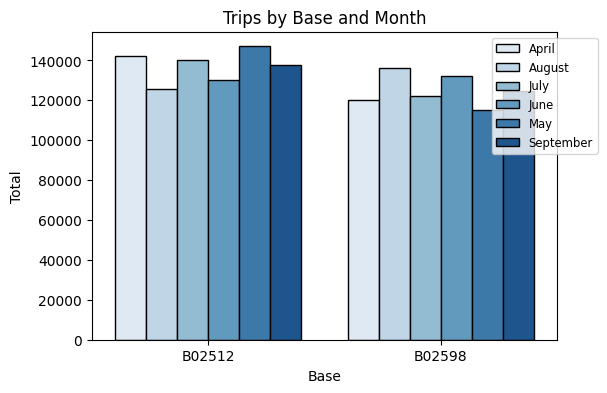

In [31]:
# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Base', y='Total', hue='Month', data = Base_Totals, palette='Blues',edgecolor = 'black')
plt.title('Trips by Base and Month')
plt.xlabel('Base')
plt.legend( loc='upper right', bbox_to_anchor=(1.1, 1),fontsize= 'small')
plt.ylabel('Total')
plt.show()

In [32]:
geo_df = mydf[['Lat','Lon']]

In [33]:
#Heat Maps

In [34]:
data = mydf.groupby(['Hour','Day']).size().unstack().fillna(0)
print(data)

Day      1      2      3      4     5     6     7     8     9     10  ...  \
Hour                                                                  ...   
0      4452   3272   4756   4400  3488  2528   584   416   348   492  ...   
1      2760   2208   2956   2492  1824  1556   316   248   216   260  ...   
2      1744   1460   1788   1788  1312   872   240   164   176   192  ...   
3      1956   2084   2040   2072  1580   576   220   224   200   244  ...   
4      1960   2616   2200   2460  1940   472   272   284   244   192  ...   
5      3060   3968   3236   3392  3300   572   396   464   560   400  ...   
6      5060   6860   5888   6328  5752   948   840  1052  1168   828  ...   
7      7696   9492   8084   8140  7436  1192   988  1456  1484  1100  ...   
8      7568   8984   7520   7660  6964  1272  1076  1284  1372  1096  ...   
9      6668   6948   6588   6516  4504  1364   912  1064  1156  1056  ...   
10     6524   6948   6804   6324  3372  1568  1108  1096  1216  1116  ...   

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
day_and_hour = mydf.groupby(['Day', 'Hour']).size().reset_index(name='Total')

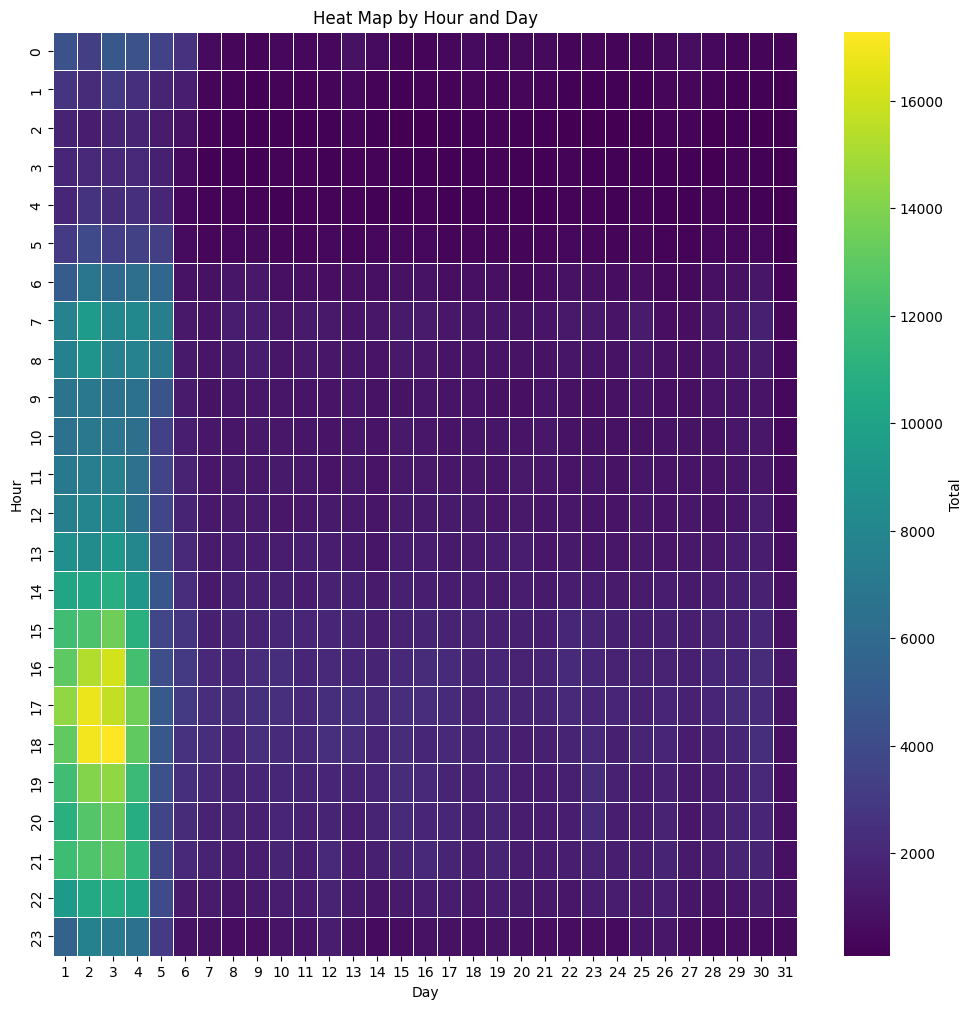

In [38]:
heatmap_data = day_and_hour.pivot(index='Hour', columns='Day', values='Total')
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Hour and Day")
plt.show()


In [40]:
month_and_day = mydf.groupby(['Month', 'Day']).size().reset_index(name='Total')

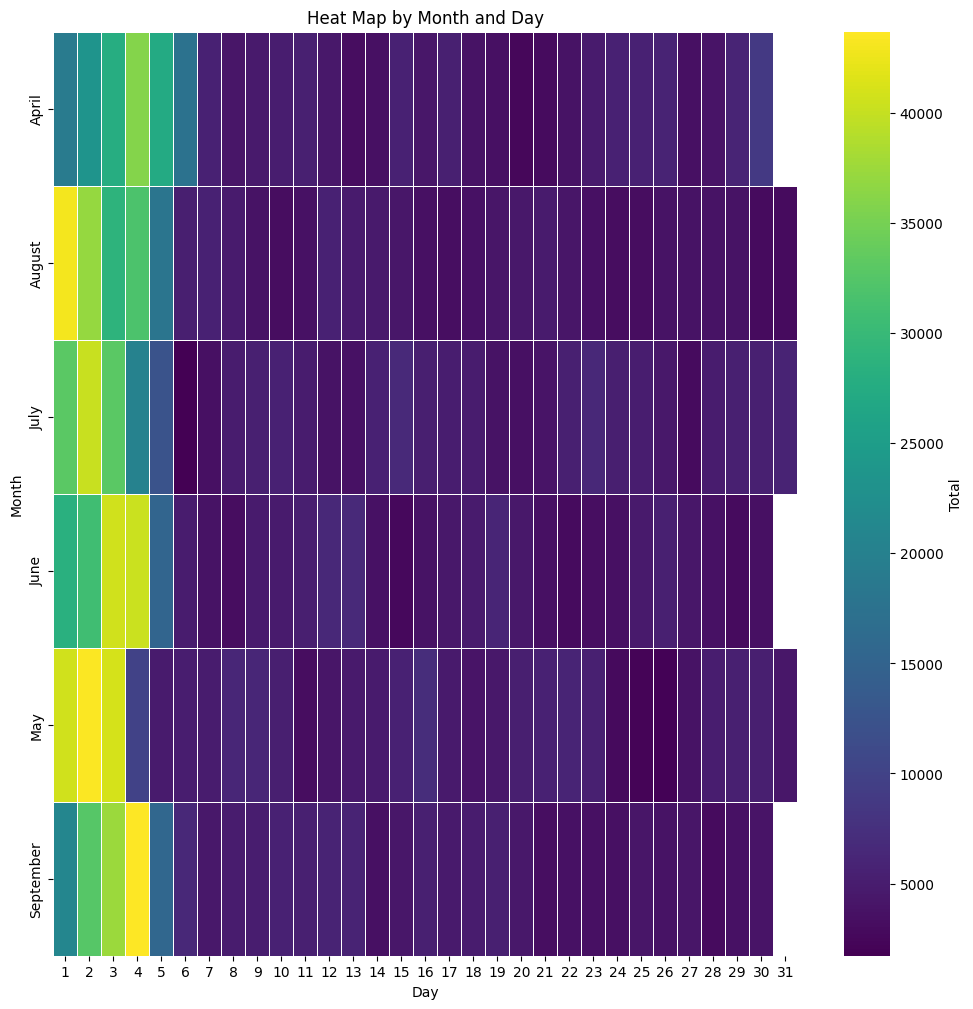

In [44]:
heatmap_data = month_and_day.pivot(index='Month', columns='Day', values='Total')
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Month and Day")
plt.show()


In [46]:
Month_Day_of_Week = mydf.groupby(['Month','Day of Week']).size().reset_index(name = 'Total')

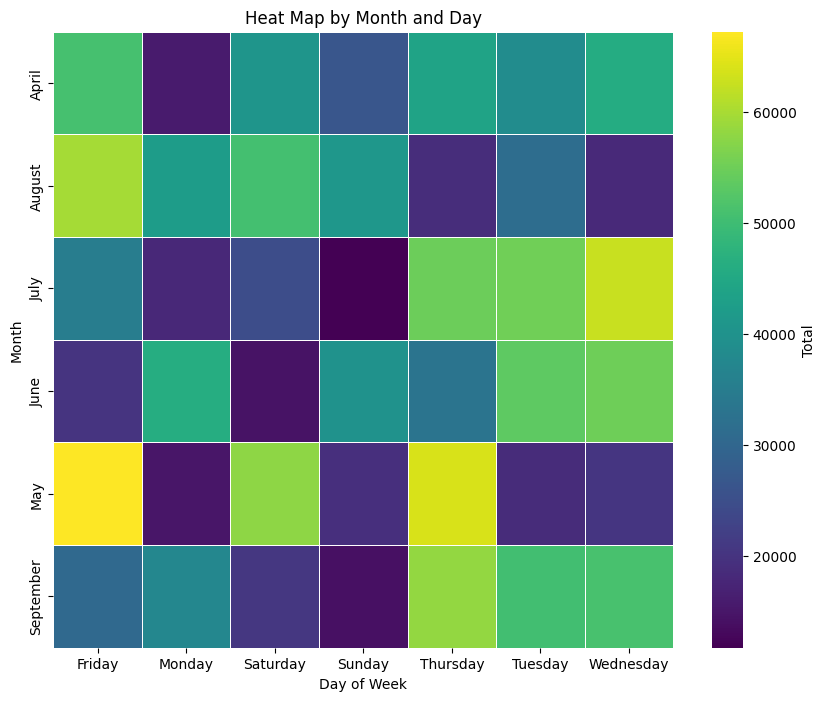

In [49]:
heatmap_data = Month_Day_of_Week.pivot(index='Month', columns='Day of Week', values='Total')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Month and Day")
plt.show()


In [51]:
Month_Base = mydf.groupby(['Month','Base']).size().reset_index(name = 'Total')

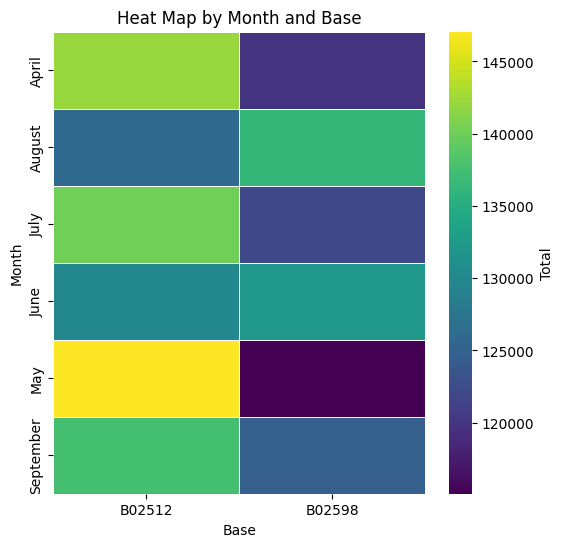

In [58]:
heatmap_data = Month_Base.pivot(index = 'Month',columns='Base',values='Total')
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Month and Base")
plt.show()


In [71]:
import geopandas as gpd

In [72]:
df_geo = gpd.GeoDataFrame(mydf,geometry= gpd.points_from_xy(mydf.Lat,mydf.Lon))

In [81]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_13676\2956320754.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
